First we must frame the problem,

This is a supervised learning problem for a prediction task.
It could either be classification i.e. what type of crime is this likely to be?
Or a regression problem (given this location or time of year for this location, how much crime is going to happen there? levels of all crime or specific crimes, look at the UK numbers generally if we don't focus on a specific area etc.)

In [7]:
import pandas as pd
import numpy as np

crime = pd.read_csv("D:/Data Mining Data/2014-2016.csv")
crime.columns = ['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category', 'Context']
crime.pop('Crime ID')
crime.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,2014-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,2014-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,2014-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Other theft,Investigation complete; no suspect identified,NaN
3,2014-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,2014-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN


In [14]:
grouped_by_lsoa = crime.groupby(["LSOA code"])
lsoa_total_crime = grouped_by_lsoa.size()
lsoa_total_crime.index.names = ['LSOA code']
lsoa_total_crime = lsoa_total_crime.reset_index()
lsoa_total_crime.columns = ['LSOA code', 'Total']
lsoa_total_crime = lsoa_total_crime.fillna(0)
lsoa_total_crime = pd.merge(lsoa_total_crime, grouped_by_lsoa["LSOA code", "Longitude", "Latitude"].first(), on="LSOA code")

In [15]:
lsoa_agg_data = crime.groupby(["LSOA code", "Crime type"]).size().unstack(level=-1)
lsoa_agg_data = lsoa_agg_data.fillna(0)
lsoa_agg_data.index.names = ['LSOA code']
lsoa_agg_data = lsoa_agg_data.reset_index()
lsoa_agg_data = pd.merge(lsoa_agg_data, lsoa_total_crime, on="LSOA code")
lsoa_agg_data

,LSOA code,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Total,Longitude,Latitude
0,E01000001,121.0,68.0,21.0,24.0,25.0,14.0,215.0,1.0,31.0,3.0,52.0,55.0,42.0,49.0,721,-0.097601,51.520699
1,E01000002,255.0,87.0,22.0,29.0,20.0,5.0,198.0,3.0,24.0,2.0,48.0,56.0,20.0,97.0,866,-0.089596,51.518743
2,E01000003,70.0,12.0,7.0,9.0,9.0,3.0,12.0,1.0,4.0,1.0,0.0,29.0,9.0,17.0,183,-0.096114,51.520747
3,E01000005,365.0,58.0,70.0,76.0,122.0,38.0,330.0,4.0,71.0,11.0,29.0,97.0,66.0,258.0,1595,-0.075508,51.514763
4,E01000006,101.0,2.0,23.0,21.0,11.0,2.0,13.0,0.0,3.0,10.0,0.0,3.0,36.0,69.0,294,0.086594,51.538753
5,E01000007,399.0,37.0,35.0,94.0,103.0,18.0,163.0,7.0,143.0,38.0,27.0,89.0,27.0,426.0,1606,0.080833,51.539500
6,E01000008,408.0,4.0,23.0,59.0,38.0,9.0,183.0,6.0,26.0,18.0,20.0,13.0,84.0,177.0,1068,0.072410,51.537611
7,E01000009,297.0,6.0,24.0,56.0,127.0,12.0,79.0,3.0,55.0,43.0,14.0,21.0,42.0,250.0,1029,0.084145,51.541333
8,E01000010,1068.0,48.0,91.0,159.0,168.0,30.0,467.0,18.0,178.0,99.0,697.0,211.0,99.0,716.0,4049,0.080169,51.535432
9,E01000011,125.0,2.0,27.0,35.0,10.0,11.0,17.0,1.0,18.0,14.0,0.0,6.0,33.0,146.0,445,0.081852,51.542615


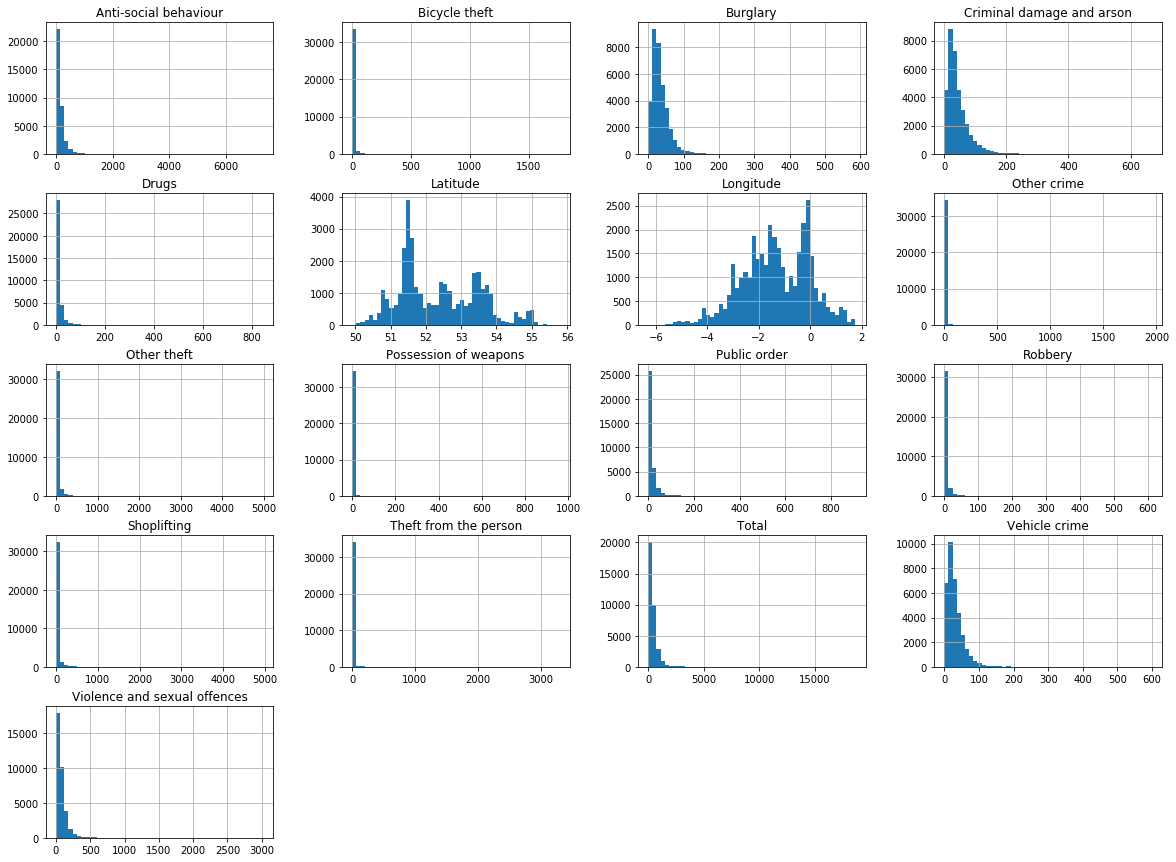

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
lsoa_agg_data.hist(bins=50, figsize=(20,15))
plt.show()

Very(!) long tailed distributions, is this correct?

In [17]:
lsoa_agg_data["Bicycle theft"].max()

1759.0

Guess it is, ah well lets look at the histograms a bit zoomed in

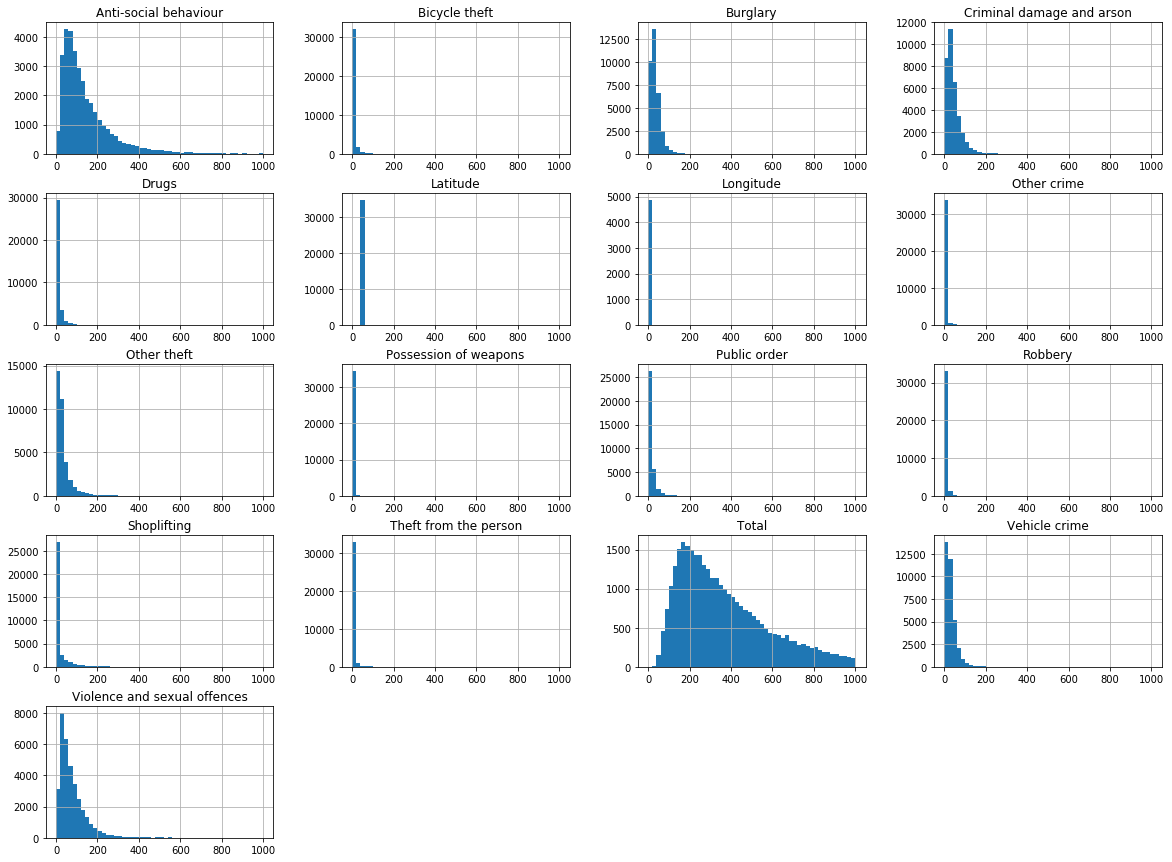

In [18]:
lsoa_agg_data.hist(bins=50, figsize=(20,15), range=(0, 1000))
plt.show()

Test sets are best when stratifying on important indicators, or random works when the data set is large

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(lsoa_agg_data, test_size=0.2, random_state=42)

In [20]:
print(len(train_set), "train +", len(test_set), "test")

27799 train + 6950 test


Make a copy of the training set so we don't mess with the test set

In [21]:
crime = train_set.copy()

# Visualisation

Start off easy with the density of LSOA codes

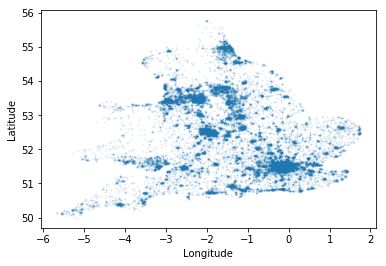

In [31]:
crime.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, s=1)

Oh look, a picture of England and Wales. Who would have thought it?

Didn't have visualisations before but we know crime is very much related to the location and population density

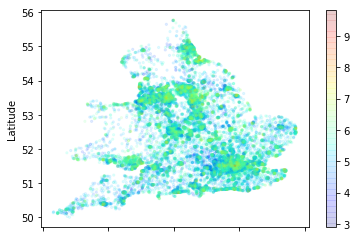

In [37]:
crime.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, s=5,
          c=np.log(crime["Total"]), cmap=plt.get_cmap("jet"), colorbar=True)

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


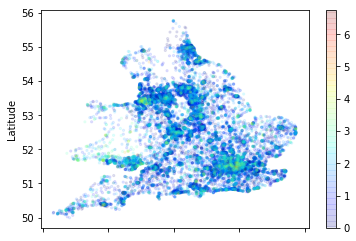

In [44]:
crime.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, s=5,
          c=np.log(crime["Drugs"]), cmap=plt.get_cmap("jet"), colorbar=True)

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


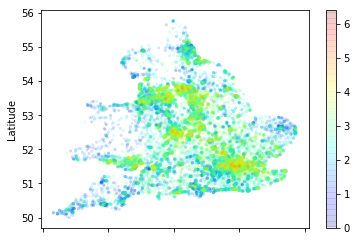

In [45]:
crime.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, s=5,
          c=np.log(crime["Vehicle crime"]), cmap=plt.get_cmap("jet"), colorbar=True)

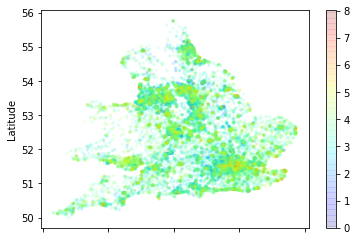

In [48]:
crime.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, s=5,
          c=np.log(crime["Violence and sexual offences"]), cmap=plt.get_cmap("jet"), colorbar=True)

In [33]:
corr_matrix = crime.corr()
corr_matrix["Total"].sort_values(ascending=False)

Total                           1.000000
Violence and sexual offences    0.934678
Anti-social behaviour           0.909853
Public order                    0.905164
Other theft                     0.855716
Shoplifting                     0.827342
Criminal damage and arson       0.810023
Drugs                           0.774243
Theft from the person           0.715262
Possession of weapons           0.700039
Robbery                         0.698447
Burglary                        0.686585
Bicycle theft                   0.677074
Vehicle crime                   0.544622
Other crime                     0.425637
Latitude                        0.042138
Longitude                       0.019846
Name: Total, dtype: float64

Crime correlates with crime. Weak correlation stating that there is more crime in the east and more in the north.

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D69C9E4E0>,
      dtype=object)

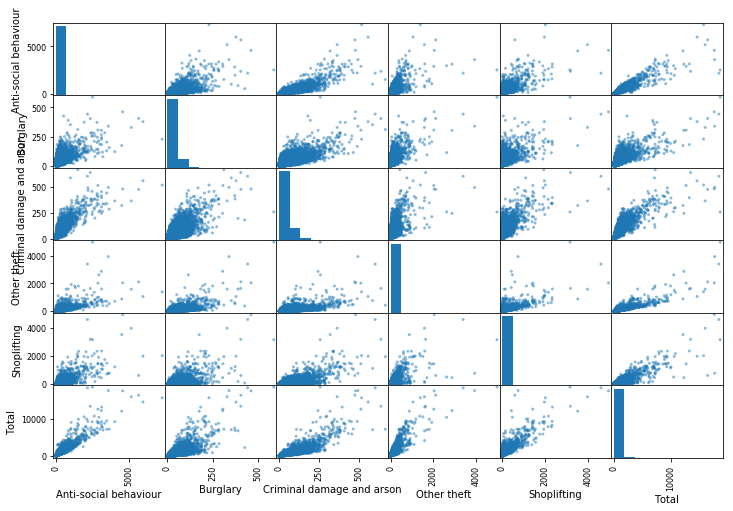

In [120]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Anti-social behaviour", "Burglary", "Criminal damage and arson", "Other theft", "Shoplifting", "Total"]
scatter_matrix(crime[attributes], figsize=(12, 8))

All these crimes seem to be correlated

The book says to make a fresh training set at this point

TODO: Feature scaling